Set-up

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from statannotations.Annotator import Annotator

In [34]:
os.getcwd()
#working directory should be /Code/CodeFigure3

'/Users/emilly/Library/CloudStorage/Dropbox/UCSF Nystul Lab/NystulLabRepo/WolfgramAgingOvary/Code/CodeFigure3'

Plotting the frequency of lysotracker band on the Fas3 border in 1 vs 6 week w1118(x)

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [35]:
csv_path = "../../Data/DataFigure3/w1118LysoFas31v6_n.csv"
df = pd.read_csv(csv_path)

In [36]:
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})

df['PerLysoFas3'] = df['LysoFas3_1v6'] *100

In [37]:
df.head(7)

,Weeks,LysoFas3_1v6,n,N,PerLysoFas3
0,1 Week,0.5294,17,1,52.94
1,1 Week,0.5238,21,2,52.38
2,1 Week,0.4884,86,3,48.84
3,6 Weeks,0.5385,13,1,53.85
4,6 Weeks,0.4286,42,2,42.86
5,6 Weeks,0.3929,28,3,39.29


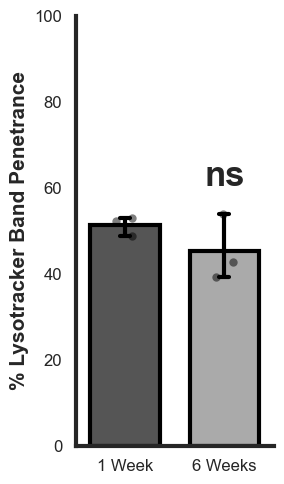

In [38]:
stats_path = "../../Results/ResultsFigure3/StatsLysoFas31v6ttest.csv"
stats = pd.read_csv(stats_path)

stats["WeekNum"] = stats["comparison"].str.extract(r"(\d+)").astype(int)
star = stats.loc[0, "stars"]
week_to_annotate = stats.loc[0, "WeekNum"]


df["WeekNum"] = df["Weeks"].str.extract(r"(\d+)").astype(int)

week_order = sorted(df["WeekNum"].unique())
label_order = (
    df.drop_duplicates("WeekNum")
      .sort_values("WeekNum")["Weeks"]
      .tolist()
)


fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x='Weeks',
    y='PerLysoFas3',
    hue='Weeks',
    palette='gray',
    capsize=0.1,
    err_kws={'color': 'black', 'linewidth': 3},
    edgecolor="black",
    linewidth=3,
    width=0.7
)

sns.stripplot(data=df, 
              x='Weeks', 
              y='PerLysoFas3',
              ax=ax, 
              color='black', 
              alpha=0.5,
              size=6, 
              jitter=True, 
              dodge=True
)

y_max = df.groupby("WeekNum")["PerLysoFas3"].max()
offset = 5

x_position = week_order.index(week_to_annotate)

ax.text(
    x=x_position,
    y=y_max.loc[week_to_annotate] + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 100)
plt.ylabel("% Lysotracker Band Penetrance", fontsize=15, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure3', 'LysoFas31v6w1118.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()

Plotting the frequency of lysotracker band on the Fas3 border in 6 week in no phenotype vs phenotype

Note: You will need to run the StatsLysotrackerw1118.csv.Rmd file first, or annotate out the stats code

In [39]:
csv_path = "../../Data/DataFigure3/w1118LysoFas3ByPheno_n.csv"
df = pd.read_csv(csv_path)

In [40]:
df['PerLysoByPheno'] = df['LysoFas3_NovsPheno'] * 100
df['Phenotype'] = df['Phenotype'].map({0: 'No Phenotype', 1: 'Phenotype'})
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})
df['Group'] = df['Weeks'] + "_" + df['Phenotype']

# Define order for plotting
categories = [
    "1 Week_Phenotype",
    "1 Week_No Phenotype",
    "6 Weeks_Phenotype",
    "6 Weeks_No Phenotype"
]
df['Group'] = pd.Categorical(df['Group'], categories=categories, ordered=True)
unique_groups = df['Group'].cat.categories

df.head(10)

,Weeks,Phenotype,LysoFas3_NovsPheno,n,N,PerLysoByPheno,Group
0,1 Week,Phenotype,0.0000,2,1,0.00,1 Week_Phenotype
1,1 Week,No Phenotype,0.6000,15,1,60.00,1 Week_No Phenotype
2,1 Week,Phenotype,0.0000,1,2,0.00,1 Week_Phenotype
3,1 Week,No Phenotype,0.5500,20,2,55.00,1 Week_No Phenotype
4,1 Week,Phenotype,0.5000,6,3,50.00,1 Week_Phenotype
5,1 Week,No Phenotype,0.4875,80,3,48.75,1 Week_No Phenotype
6,6 Weeks,Phenotype,0.2857,7,1,28.57,6 Weeks_Phenotype
7,6 Weeks,No Phenotype,0.8333,6,1,83.33,6 Weeks_No Phenotype
8,6 Weeks,Phenotype,0.3333,36,2,33.33,6 Weeks_Phenotype
9,6 Weeks,No Phenotype,1.0000,6,2,100.00,6 Weeks_No Phenotype


/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_87987/3897619751.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/var/folders/nx/qkkxq7n92pg6rvbn9x9t9lrr0000px/T/ipykernel_87987/3897619751.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


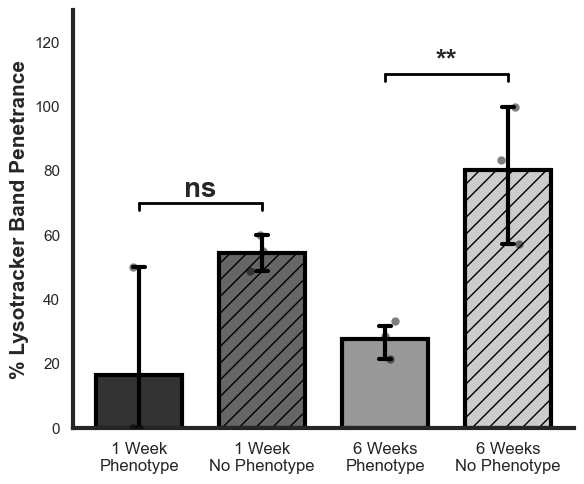

In [41]:
stats_path = "../../Results/ResultsFigure3/StatsLysoFas3byPhenoGlmm.csv"
stats = pd.read_csv(stats_path)

fig, ax = plt.subplots(figsize=(6, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x="Group",
    y="PerLysoByPheno",
    palette="gray",
    capsize=0.1,
    err_kws={"color": "black", "linewidth": 3},
    edgecolor="black",
    linewidth=3,
    width=0.7,
    ax=ax
)

sns.stripplot(
    data=df,
    x="Group",
    y="PerLysoByPheno",
    color="black",
    alpha=0.5,
    size=6,
    jitter=True,
    ax=ax
)

for i, label in enumerate(ax.get_xticklabels()):
    if "No Phenotype" in label.get_text():
        barplot.patches[i].set_hatch("//")


ax.figure.canvas.draw() 
bar_positions = [patch.get_x() + patch.get_width() / 2 for patch in barplot.patches]

unique_groups = [t.get_text().replace("\n", "_") for t in ax.get_xticklabels()]


for _, row in stats.iterrows():
    term = row['term']
    star = row['stars']

    if term == "Phenotype_1week":
        groups_to_match = ["1 Week_Phenotype", "1 Week_No Phenotype"]
    elif term == "Phenotype_6week":
        groups_to_match = ["6 Weeks_Phenotype", "6 Weeks_No Phenotype"]
    else:
        continue

    group_bars = [i for i, g in enumerate(unique_groups) if g in groups_to_match]
    if len(group_bars) != 2:
        print(f"Skipping {term}, group_bars={group_bars}")
        continue

    x1 = bar_positions[group_bars[0]]
    x2 = bar_positions[group_bars[1]]
    x_mid = (x1 + x2) / 2
    y_max = df[df["Group"].isin(groups_to_match)]["PerLysoByPheno"].max()
    star_offset = 10
    bracket_height = 2
    y_bracket = y_max + star_offset

    ax.plot([x1, x2], [y_bracket, y_bracket], color="black", linewidth=2)
    ax.plot([x1, x1], [y_bracket, y_bracket - bracket_height], color="black", linewidth=2)
    ax.plot([x2, x2], [y_bracket, y_bracket - bracket_height], color="black", linewidth=2)

    ax.text(
        x_mid,
        y_bracket,
        star,
        ha="center",
        va="bottom",
        fontsize=20,
        fontweight="bold"
    )

ax.set_xticklabels(
    ["1 Week\nPhenotype", "1 Week\nNo Phenotype",
     "6 Weeks\nPhenotype", "6 Weeks\nNo Phenotype"],
    fontsize=12
)

plt.ylim(0, 130)
plt.ylabel("% Lysotracker Band Penetrance", fontsize=15, weight="bold")
plt.xlabel("")

ax.tick_params(width=3)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Remove legend safely
leg = ax.get_legend()
if leg is not None:
    leg.remove()

# -----------------------------
# Save figure
# -----------------------------
results_directory = "../../Results/ResultsFigure3"
os.makedirs(results_directory, exist_ok=True)
filename = os.path.join(results_directory, "LysoFas3ByPhenotype.pdf")
plt.tight_layout()
plt.savefig(filename, format="pdf", bbox_inches="tight")
plt.show()


Plotting phenotype penetrance in no Lysotracker band condition for 1 vs 6 weeks w1118

Note: You will need to run the StatsLysotrackerw1118.Rmd file first, or annotate out the stats code

In [50]:
csv_path = "../../Data/DataFigure3/w1118NoLysoFas3PhenoPen1v6_n.csv"
df = pd.read_csv(csv_path)

In [51]:
df['Weeks'] = df['Weeks'].map({1: '1 Week', 6: '6 Weeks'})

df['PerNoBandPheno'] = df['NoLysoFas3_Pheno1v6'] *100

In [52]:
df.head(7)

,Weeks,NoLysoFas3_Pheno1v6,n,N,PerNoBandPheno
0,1 Week,0.2500,8,1,25.00
1,1 Week,0.1000,10,2,10.00
2,1 Week,0.0682,44,3,6.82
3,6 Weeks,0.8333,6,1,83.33
4,6 Weeks,1.0000,24,2,100.00
5,6 Weeks,0.6471,17,3,64.71


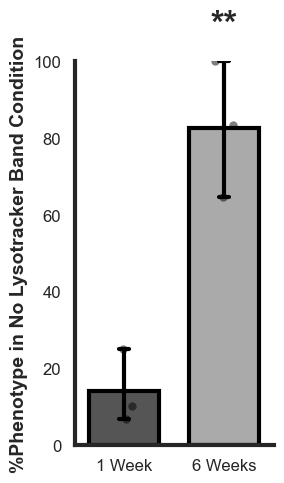

In [55]:
stats_path = "../../Results/ResultsFigure3/StatsPhenoNoLyso1v6ttest.csv"
stats = pd.read_csv(stats_path)

stats["WeekNum"] = stats["comparison"].str.extract(r"(\d+)").astype(int)
star = stats.loc[0, "stars"]
week_to_annotate = stats.loc[0, "WeekNum"]


df["WeekNum"] = df["Weeks"].str.extract(r"(\d+)").astype(int)

week_order = sorted(df["WeekNum"].unique())
label_order = (
    df.drop_duplicates("WeekNum")
      .sort_values("WeekNum")["Weeks"]
      .tolist()
)


fig, ax = plt.subplots(figsize=(3, 5))
sns.set(style="white")

barplot = sns.barplot(
    data=df,
    x='Weeks',
    y='PerNoBandPheno',
    hue='Weeks',
    palette='gray',
    capsize=0.1,
    err_kws={'color': 'black', 'linewidth': 3},
    edgecolor="black",
    linewidth=3,
    width=0.7
)

sns.stripplot(data=df, 
              x='Weeks', 
              y='PerNoBandPheno',
              ax=ax, 
              color='black', 
              alpha=0.5,
              size=6, 
              jitter=True, 
              dodge=True
)

y_max = df.groupby("WeekNum")["PerNoBandPheno"].max()
offset = 5

x_position = week_order.index(week_to_annotate)

ax.text(
    x=x_position,
    y=y_max.loc[week_to_annotate] + offset,
    s=star,
    ha="center",
    va="bottom",
    fontsize=25,
    fontweight="bold"
)

plt.ylim(0, 100)
plt.ylabel("%Phenotype in No Lysotracker Band Condition", fontsize=14, weight="bold")
plt.xlabel("")

ax.tick_params(width=3, labelsize=12)
ax.spines["left"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

results_directory = '../../Results'
filename = os.path.join(results_directory, 'ResultsFigure3', 'PhenoPenetranceNoLyso1v6w1118.pdf')
os.makedirs(os.path.dirname(filename), exist_ok=True)
plt.savefig(
    filename,
    format='pdf',
    bbox_inches='tight'
)

plt.tight_layout()
plt.show()